In [1]:
from IPython.display import clear_output

!wget -O event_log.csv https://www.dropbox.com/s/bwk7xwew383u84q/sp2020.csv?dl=1

clear_output()
print("Log loaded.")

Log loaded.


In [2]:
!pip install mpvis
!pip install pm4py

clear_output()
print("Packages installed.")

Packages installed.


In [3]:
import mpvis
from mpvis import mddrt
from mpvis import mpdfg
import pm4py
import pandas as pd
from datetime import datetime
from IPython.display import SVG, display
clear_output()

In [4]:
event_log = pd.read_csv('event_log.csv', sep = ';')

log_format = {'case:concept:name': 'CASE_ID',
              'concept:name': 'ACTIVITY',
              'time:timestamp': 'TIMESTAMP',
              'start_timestamp': '',
              'org:resource': '',
              'cost:total': ''}

event_log = mpvis.log_formatter(event_log.copy(), log_format)

In [5]:
print("Case count: " + str(len(set(event_log['case:concept:name']))))
print("Variant count: " + str(len(pm4py.stats.get_variants(event_log.copy()))))
print("Event count: " + str(len(event_log['case:concept:name'])))
print("Activity count: " + str(len(set(event_log['concept:name']))))

Case count: 23906
Variant count: 2727
Event count: 178078
Activity count: 13


In [6]:
mpdfg_discovery_start = datetime.now()

dfg, start_activities, end_activities = mpdfg.discover_multi_perspective_dfg(event_log.copy())

mpdfg_discovery_end = datetime.now()

print("MP-DFG discovery time: " + str((mpdfg_discovery_end - mpdfg_discovery_start).total_seconds()) + " seconds.")

MP-DFG discovery time: 60.954126 seconds.


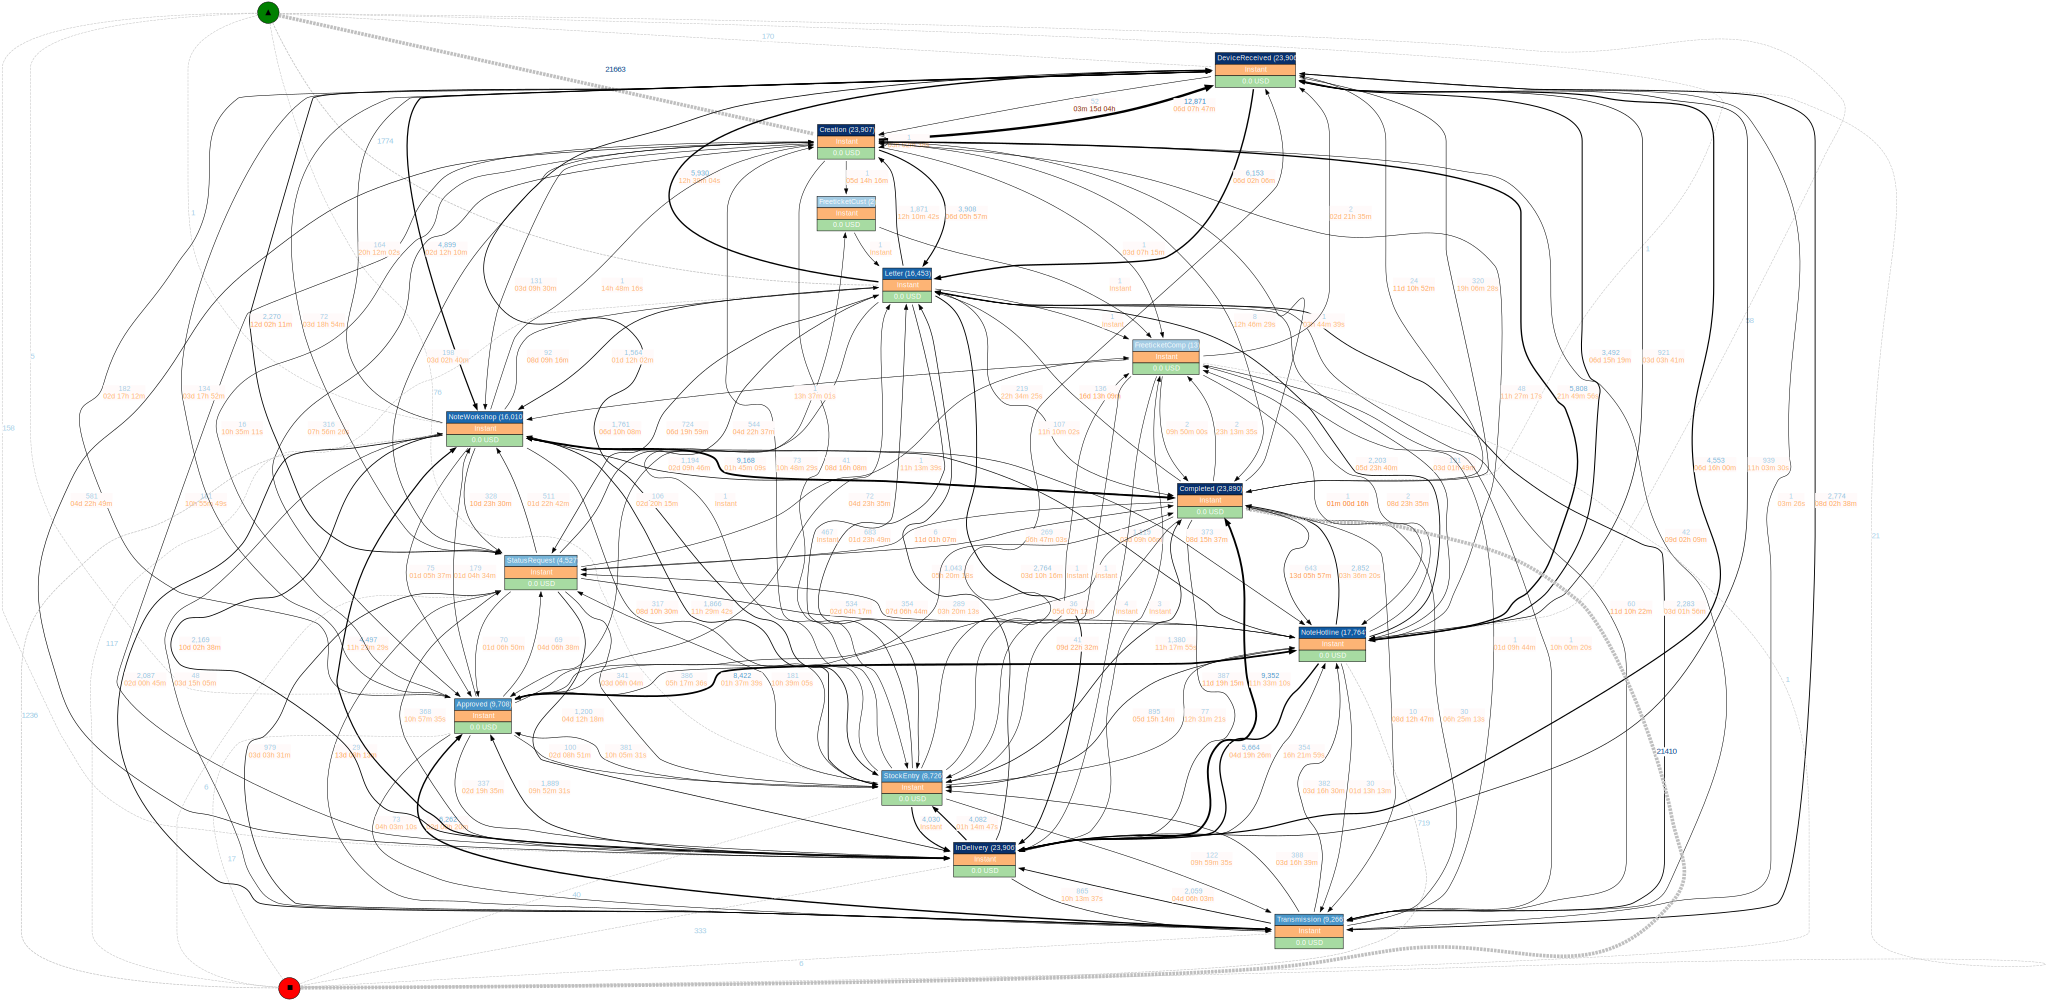

MP-DFG visualization time: 0.616242 seconds.


In [7]:
mpdfg_visualization_start = datetime.now()

mpdfg.view_multi_perspective_dfg(dfg, start_activities, end_activities)

mpdfg_visualization_end = datetime.now()

print("MP-DFG visualization time: " + str((mpdfg_visualization_end - mpdfg_visualization_start).total_seconds()) + " seconds.")

In [8]:
mddrt_discovery_start = datetime.now()

drt = mddrt.discover_multi_dimensional_drt(event_log.copy())

mddrt_discovery_end = datetime.now()

print("MD-DRT discovery time: " + str((mddrt_discovery_end - mddrt_discovery_start).total_seconds()) + " seconds.")

Calculating log mandatory activities: 


100%|██████████| 23906/23906 [07:21<00:00, 54.11it/s]


Calculating log metrics: 


100%|██████████| 23906/23906 [07:22<00:00, 54.00it/s]


Building Tree Cases:


100%|██████████| 23906/23906 [02:33<00:00, 155.55it/s]


Building Tree Graph:


100%|██████████| 23906/23906 [00:03<00:00, 6561.25it/s]


MD-DRT discovery time: 1042.668358 seconds.


In [9]:
mddrt_visualization_start = datetime.now()

mddrt.view_multi_dimensional_drt(drt)

mddrt_visualization_end = datetime.now()

print("MD-DRT visualization time: " + str((mddrt_visualization_end - mddrt_visualization_start).total_seconds()) + " seconds.")

Output hidden; open in https://colab.research.google.com to view.

In [10]:
print("MP-DFG discovery time: " + str((mpdfg_discovery_end - mpdfg_discovery_start).total_seconds()) + " seconds.")
print("MP-DFG visualization time: " + str((mpdfg_visualization_end - mpdfg_visualization_start).total_seconds()) + " seconds.")
print("MD-DRT discovery time: " + str((mddrt_discovery_end - mddrt_discovery_start).total_seconds()) + " seconds.")
print("MD-DRT visualization time: " + str((mddrt_visualization_end - mddrt_visualization_start).total_seconds()) + " seconds.")

MP-DFG discovery time: 60.954126 seconds.
MP-DFG visualization time: 0.616242 seconds.
MD-DRT discovery time: 1042.668358 seconds.
MD-DRT visualization time: 90.961189 seconds.


In [11]:
# A copy of the original log is used to allow comparing the processed and original logs
processed_log = event_log.copy()

In [12]:
# The original log contains several cases that seem to be incomplete (e.g., they do not start or end with a valid activity)
# Only cases that start with 'Creation' and that end with 'Completion' will be considered
processed_log = pm4py.filter_start_activities(processed_log, ['Creation'])
processed_log = pm4py.filter_end_activities(processed_log, ['Completed'])

# Some activities occur only 2-13 times and seem to be input errors
# Cases containing these activities are removed, as their inclusion increments the complexity of the process models without providing additional insights
processed_log = pm4py.filter_event_attribute_values(processed_log, 'concept:name', ['FreeticketComp', 'FreeticketCust'], level = 'case', retain = False)

print("Case count before: " + str(len(set(event_log['case:concept:name']))))
print("Case count after: " + str(len(set(processed_log['case:concept:name']))))

Case count before: 23906
Case count after: 19523


In [13]:
# Some activities are associated to status checks and notes (e.g., StatusRequest, NoteHotline)
# These activities are removed, as their inclusion increases the variant count considerably
processed_log = pm4py.filter_event_attribute_values(processed_log, 'concept:name', ['StatusRequest', 'NoteHotline', 'NoteWorkshop'], level = 'event', retain = False)

print("Variant count before: " + str(len(pm4py.stats.get_variants(event_log.copy()))))
print("Variant count after: " + str(len(pm4py.stats.get_variants(processed_log.copy()))))

Variant count before: 2727
Variant count after: 114


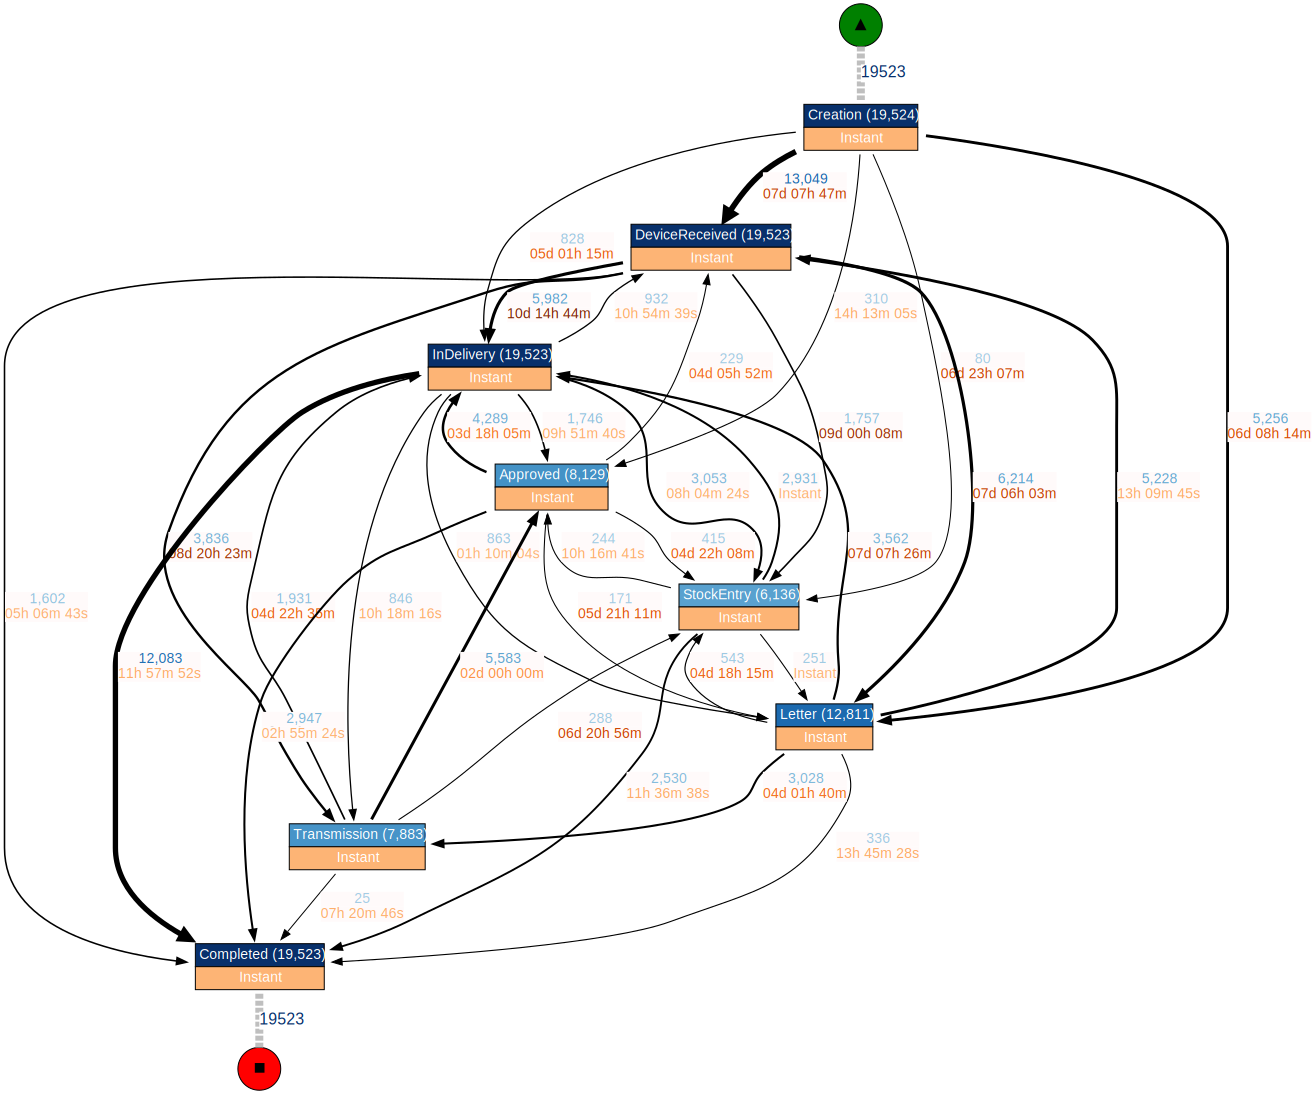

In [14]:
dfg, start_activities, end_activities = mpdfg.discover_multi_perspective_dfg(processed_log.copy())

# The frequency of many paths is not high, so only the most common ones are considered
filtered_dfg = mpdfg.filter_multi_perspective_dfg_paths(75, dfg, start_activities, end_activities)

mpdfg.save_vis_multi_perspective_dfg(filtered_dfg, start_activities, end_activities, file_name = 'dfg_processed_log_100_75', format = 'svg', visualize_cost = False)
display(SVG(filename = 'dfg_processed_log_100_75.svg'))

Calculating log mandatory activities: 


100%|██████████| 19194/19194 [03:45<00:00, 85.20it/s] 


Calculating log metrics: 


100%|██████████| 19194/19194 [03:53<00:00, 82.28it/s]


Building Tree Cases:


100%|██████████| 19194/19194 [01:43<00:00, 184.90it/s]


Building Tree Graph:


100%|██████████| 19194/19194 [00:02<00:00, 7849.83it/s] 


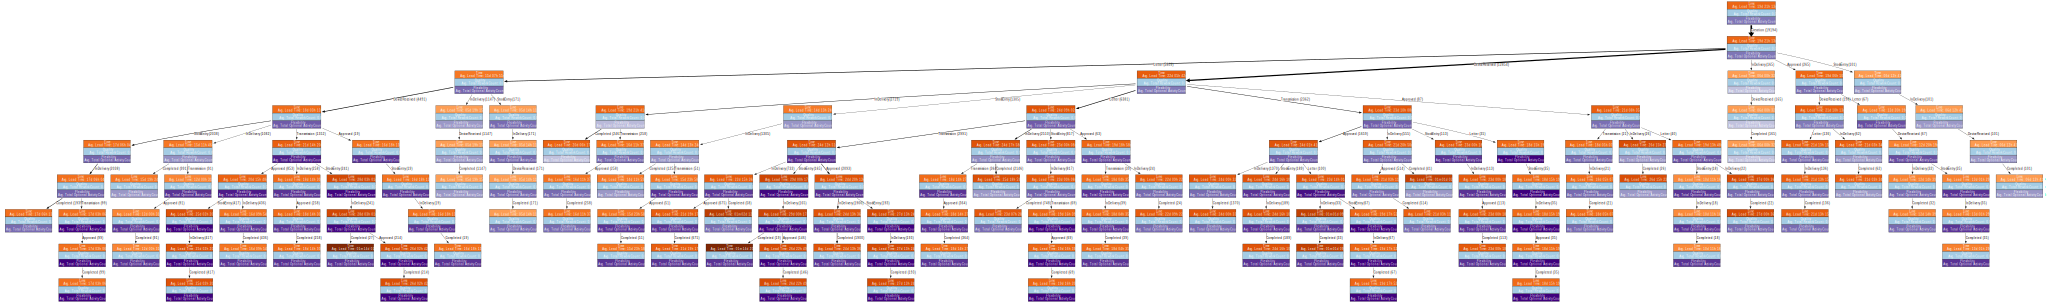

In [17]:
# Since some variants of the process rarely occur (i.e., less than 5 times), only the 40% most common variants are considered
pruned_log = mpvis.preprocessing.prune_log_based_on_top_variants(processed_log.copy(), k = 46)

drt = mddrt.discover_multi_dimensional_drt(pruned_log.copy())
mddrt.save_vis_multi_dimensional_drt(drt, file_path = 'drt_processed_log_40_variants', visualize_cost = False)
display(SVG(filename = 'drt_processed_log_40_variants.svg'))